In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import cv2
from albumentations import Rotate
from scipy import ndimage
import imutils
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
from skimage.morphology import medial_axis, skeletonize, thin, remove_small_objects
import rdp
import math
from tqdm import tqdm
import sys
sys.path.append('../Scripts/')
from segmentation_utils import *
from metrics import *
from image_utils import *

## Filter Visualization

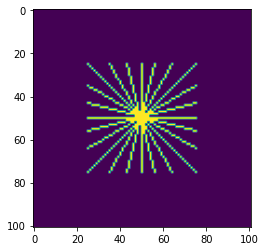

In [2]:
img = get_line_arrays(101, 51, math.pi/12*0)
for i in range(12):
    img += get_line_arrays(101,51, math.pi/12*i)
plt.imshow(img.clip(max = 1, min = 0))

## Define Path

In [3]:
# img_paths = sorted(glob.glob('../Data/center_cropped/*')) #Original Folder
img_paths = sorted(glob.glob('../Data/FAZ_Tortuosity/*/*')) #Original Folder

In [4]:
img_orig = cv2.imread(img_paths[1], 0)
seg_img = segment(img_orig)

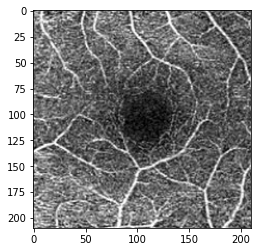

In [5]:
plt.imshow(crop_image(clean_image(img_orig)), cmap = 'gray')

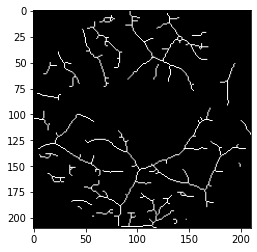

In [6]:
plt.imshow(seg_img, cmap = 'gray')

## Vessel Extraction from Segmented Vessels

In [7]:
all_points = get_points(seg_img)

In [8]:
all_unique = get_all_unique(all_points)

## Tortuosity Measures

In [9]:
points = get_turning_points(seg_img,tolerance=2,min_angle=np.pi*0.15)

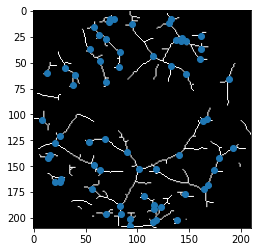

In [10]:
plt.scatter(points.T[0],points.T[1])
plt.imshow(seg_img,cmap='gray')

In [11]:
tpt = 0
for j in range(len(all_unique)):
    tort,dm,ip,tp,sd = tortousity(all_unique[j])
    tpt+=tp
    print(tort,dm,tp,sd)
    print('###########')
#     segment = makeImage(all_unique[j],(210,210))
#     for i in ip:
#         plt.scatter(i[0],i[1])
#     plt.imshow(segment)
#     plt.show()

0.0 0.003691587518358519 1 4.922206759369907
###########
0.0 0.014966737352738457 1 9.790507322693955
###########
0.0 1.353000997683651e-06 0 0.094247399295639
###########
0.0 7.24257221751401e-07 0 0.06896252062088055
###########
0.0 0.012919874563112943 0 9.141677582990347
###########
0.0 0.04966617417043118 3 74.23837938975169
###########
0.0 0.00158734488721346 1 3.2273508544174474
###########
0.0 0.2902806844371453 2 55.29736665989325
###########
0.0 0.17462702119179685 2 64.21319492818274
###########
0.01479539409091357 0.7385291734993986 2 37.7328927062386
###########
0.0 0.00014500783037041387 0 0.9758996201503227
###########
0.0 0.0 0 7.888609052210118e-31
###########
0.0 0.0 0 3.1554436208840472e-30
###########
0.0 1.353000997683651e-06 0 0.0942473992956392
###########
0.026605943159304753 1.0008797119347494 0 2.5915184705017897
###########
0.0 0.028628138619063215 0 13.605702968495308
###########
0.0 6.721081104887894e-05 0 0.664712850309222
###########
0.0 0.0 0 1.262177448